# Chapter 8. Advanced decision trees 
- Ensemble
- Bagging
- Random forest
- Gradient boosting

## 8-1. Ensemble
- consolidate base models to get better prediction
    - __training__ : base models are trained individually
    - __prediction__ : collect base model predictions
        * classification : __majority__ vote
        * regression : __mean__ of base model predictions

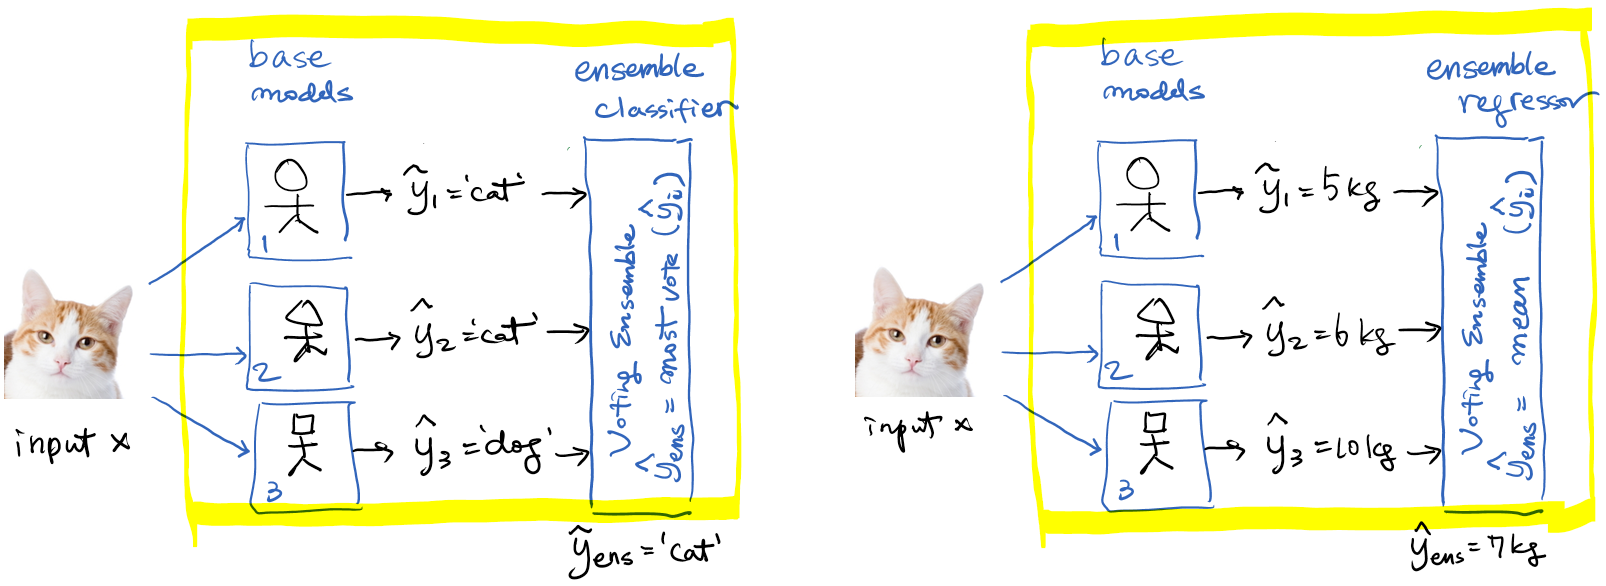

- __Homogeneous ensemble__
    * base models are of same type
    * trained with different subset of samples or features
        * individual base model may easily overfit
        * ensemble of them shows much better generalization 
    * eg: bagging of decision trees, bagging of k-NN, ...
    * eg: random forest, NN with different parameters
    * cf. gradient boosting is not considered as an ensemble
- __Heterogeneous ensemble__
    * base models are of different types
        * each model has their own strength and weakness
        * ensemble usually shows better performance than the best base model
            * ensemble can help base models work complementarily
    * trained with same training set
    * eg : `VotingClassifier` in sklearn with gradient boosting, suppot vector machine, linear model, etc
        * if random forest or bagging of decision tree is included, it is an _ensemble of ensembles_

## 8-2. Bagging : homogeneous ensemble
- bag of base models (of same type)
    * individual models can overfit to data
    * ensemble can help generalization
- each base model is trained with a subset of training data (and subset of features) 
    * bootstrapping (resampling w/ replacement)
        * bagging : Bootstrap AGGregatING
- base model w/ adaptive complexity can be used
    * base model should have enough complexity to explain training data
        - decision tree, k-nearest neighbor, neural net, ...
    * linear models are not appropriate for bagging
        - linear models does not overfit, since $n$ >> $p$ usually
            * $n$ : the number of samples
            * $p$ : the number of parameters
- sklearn provides bagging ensembler
    - `sklearn.ensemble.BaggingClassifier` 
        - default base model : `DecisionTreeClassifier`
    - `sklearn.ensemble.BaggingRegressor`
        - default base model : `DecisionTreeRegressor`
    - Bagging in sklearn also allows to select a random subset of features
        - $D_i$ : training set for tree $i$
            * $n_i$-samples $\times$ $p_i$-features
            * $n_i$ samples are randomly drawn (with replacement) from total $n$ data 
                * `max_samples` parameter
            * $p_i$ features are also randomly drawn
                * `max_features` parameter
        - similar to Random Forest (see below for difference)

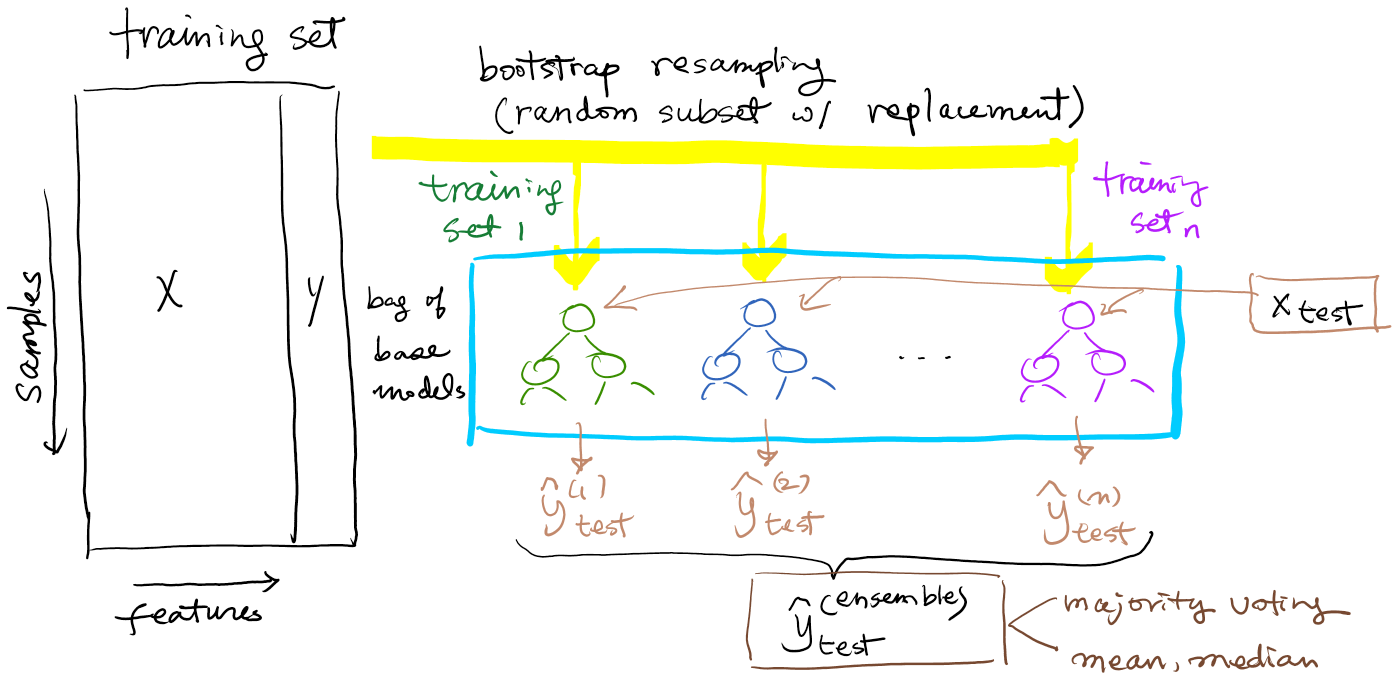

### __Bootstrap sampling__
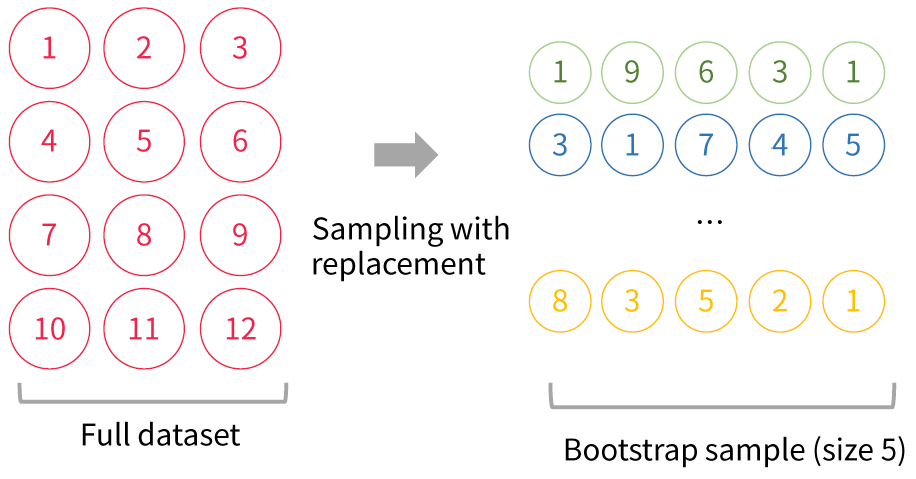

## 8-3. Random Forest

- Bagging trees 
    * a random subset (with replacement) of data is used for training each tree
    * trees in a bag are usually quite correlated
- Random forest 
    * a kind of bagging with more randomization 
        * to break correlation between trees
    * sample selection for training individual tree : same as bagging
        * $n_i$ samples are randomly drawn (with replacement) from total $n$ data 
    * when __selecting split axis(feature)__ in builing a tree, only a __random subset of feature__ is considered
        * $p$ : total features
        * Usually $\sqrt p$ features are considered for split axis selection
- `sklearn` provides random forest
    - `sklearn.ensemble.RandomForestClassifier` 
    - `sklearn.ensemble.RandomForestRegressor`
    - some parameters
        * `n_estimators` : # of trees 
        * `max_depth` : maximum depth of each tree
        * `max_samples` : sample size for training each tree
        * `max_features` : features to be considered for each split selection
            * `max_features='sqrt'` : $\sqrt p$ is used
            * `max_features='log2'` : $\log_2 p$ is used
            * `max_features='auto'` : $p$ is used, default
        * other parameters are similar to `sklearn.tree.DecisionTreeClassifier`

## 8-4. Comparing Logistic Regression / DT / Bagging / Random Forest
- Logistic Regression
- Decision tree (single)
- Bagging
- Random forest

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def print_cv_score(model, X, Y, cv=10, prefix=''):
    single = cross_val_score(model, X, Y, cv=cv)
    print (f'{prefix} R^2 mean = {single.mean():.3f}, std = {single.std():.3f}')

def compare_classification(X, Y, dataset_name):
    print (f"Testing classification performance for {dataset_name}")
    
    lr = linear_model.LogisticRegression(multi_class='multinomial', max_iter=300)
    print_cv_score(lr, X, Y, prefix='Logistic reg.:')

    dt = tree.DecisionTreeClassifier()
    print_cv_score(dt, X, Y, prefix='Single DT:')

    bdt = ensemble.BaggingClassifier(n_estimators=25)
    print_cv_score(bdt, X, Y, prefix='Bag of DTs:')

    rf = ensemble.RandomForestClassifier(n_estimators=25)
    print_cv_score(rf, X, Y, prefix='Random forest:')

### 8-4-1. Iris dataset
##### Iris dataset classification results (10-fold cross validation)
- Losistic regression (Softmax) mean accuracy = 0.973
- Single DT mean accuracy = 0.953
- Bagging DTs mean accuracy = 0.960
- Random forest mean accuracy = 0.960

In [3]:
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
Y_iris = iris['species']

In [5]:
compare_classification(X_iris, Y_iris, "Iris dataset")

Testing classification performance for Iris dataset
Logistic reg.: R^2 mean = 0.973, std = 0.033
Single DT: R^2 mean = 0.953, std = 0.043
Bag of DTs: R^2 mean = 0.960, std = 0.044
Random forest: R^2 mean = 0.960, std = 0.044


#### feature importance

In [9]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_iris, Y_iris)
print(dt.feature_importances_)

rf = ensemble.RandomForestClassifier(n_estimators=25)
rf.fit(X_iris, Y_iris)
print(rf.feature_importances_)

[0.02666667 0.         0.05072262 0.92261071]
[0.17003761 0.02800895 0.49895566 0.30299778]


### 8-4-2. Breast cancer dataset
- Predicting breast cancer from biopsy (n = 569)
- __Features__ (X) : 30 columns
    * computed from a digitized image of FNA of a breast mass.
        * FNA (fine needle aspirate) : a type of taking biopsy sample
    * describe characteristics of the cell nuclei present in the image
        * 'mean radius' : mean radius of cell nuclei
        * ...
- __Labels__ (Y) : 0('benign'),  1('malignant')

##### Breast cancer dataset classification results (10-fold cross validation)
- Losistic regression (Softmax) mean accuracy = 0.947
- Single DT mean accuracy = 0.912
- Bagging DTs mean accuracy = 0.954
- Random forest mean accuracy = 0.963

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print (cancer.keys())
print (cancer.feature_names)
print (cancer.target_names)

X_cancer = cancer.data
Y_cancer = cancer.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
compare_classification(X_cancer, Y_cancer, "breast cancer dataset")

Testing classification performance for breast cancer dataset
Logistic reg.: R^2 mean = 0.947, std = 0.021
Single DT: R^2 mean = 0.914, std = 0.032
Bag of DTs: R^2 mean = 0.947, std = 0.044
Random forest: R^2 mean = 0.954, std = 0.037


### 8-4-3. MNIST dataset

##### MNIST classification results (long computation time required)
- Losistic regression (Softmax) mean accuracy = 0.919
- Single DT mean accuracy = 0.873
- Bagging DTs mean accuracy = 0.953
- Random forest mean accuracy = 0.962
    * bagging or RF take too much time for cross validation
- cf. Neural nets
    - NN-SLP test accuracy = 0.917  (identical to softmax)
    - NN-2LP test accuracy = 0.974
    - NN-5LP test accuracy = 0.972
    - NN-CNN test accuracy = 0.989

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [19]:
X_mnist = mnist.data  # 70000 images
Y_mnist = mnist.target  # 70000 targets

In [20]:
# this takes about 1.5 hours
compare_classification(X_mnist, Y_mnist, "MNIST dataset")

Testing classification performance for MNIST dataset
Logistic reg.: R^2 mean = 0.919, std = 0.006
Single DT: R^2 mean = 0.873, std = 0.007
Bag of DTs: R^2 mean = 0.953, std = 0.004
Random forest: R^2 mean = 0.962, std = 0.004


## 8-5. Boosting trees

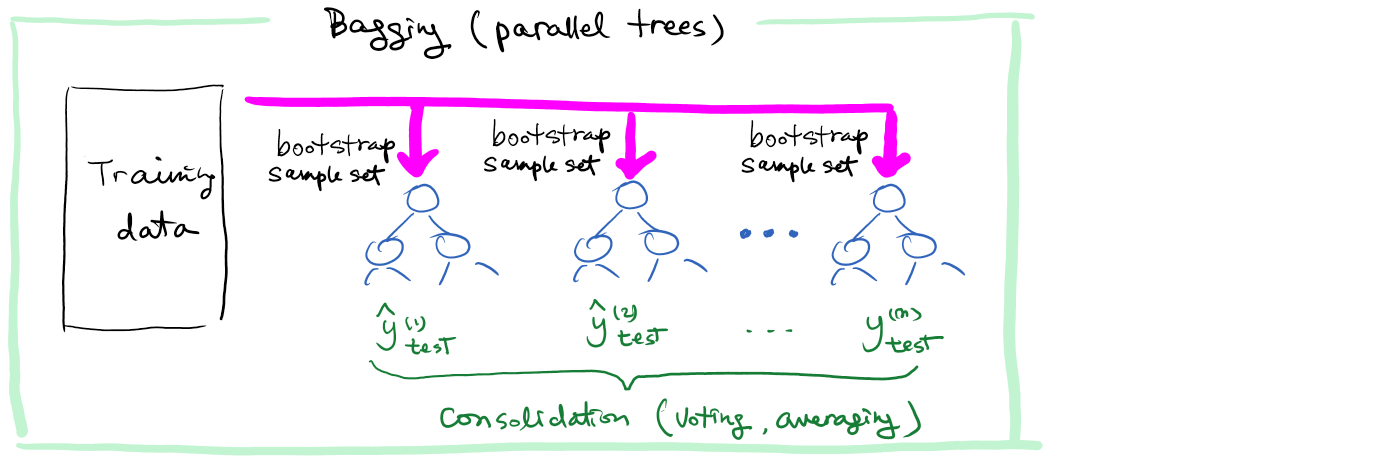

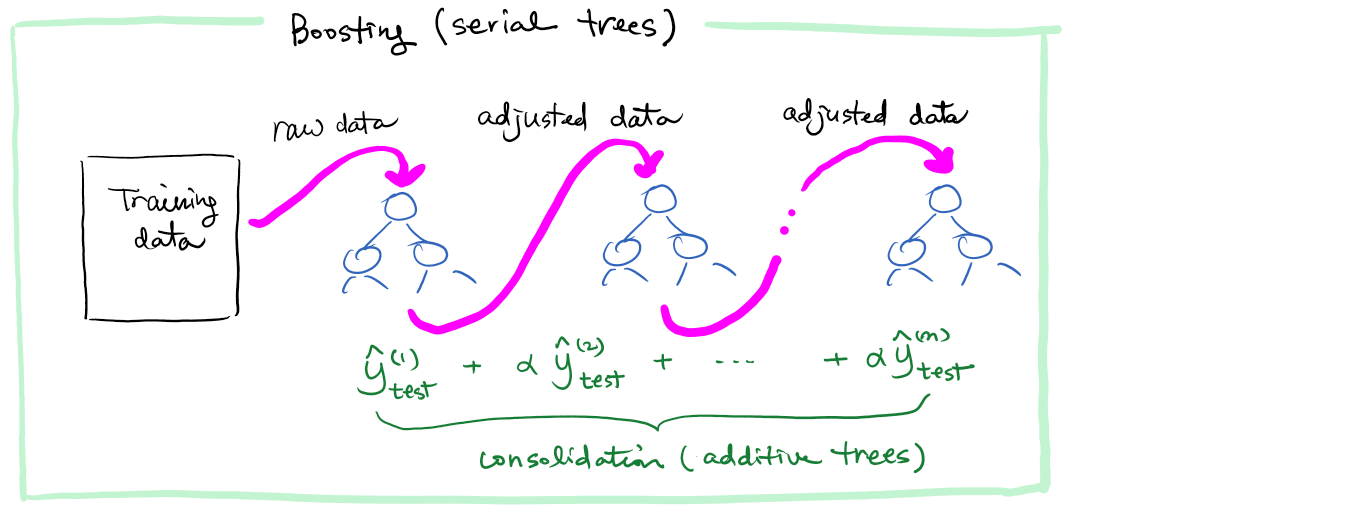

### 8-5-1. Bagging vs Boosting
* both bagging and boosting uses many trees
* bagging : homogeneous ensemble of parallel trees 
    * each tree is deep, so it overfits
    * ensemble generalizes well
* boosting : series of trees, not an ensemble 
    * each tree is small, so it underfits
    * error is progressively adjusted by adding trees

### 8-5-2. History of boosting algorithms    
* history of boosting algorithms
    * AdaBoost (Adaptive Boosting) - Freund and Schapire, J. of Computer and System Sciences, 1997
    * Gradient Boosting Machine - Friedman, 1999
        * Gradient descent + Boosting
    * XGBoost (eXtreme Gradient Boosting) - Chen and Guestrin, KDD '16
    * LightGBM - Ke et al, NIPS '17

### 8-5-3. Boosting tree for regression (Residual fitting algorithm)
- start from a crude model (single node tree)
- add details by fitting a small tree to residual (error)
    * stump (level 1 tree) : AdaBoost
    * level 1~5 trees are used

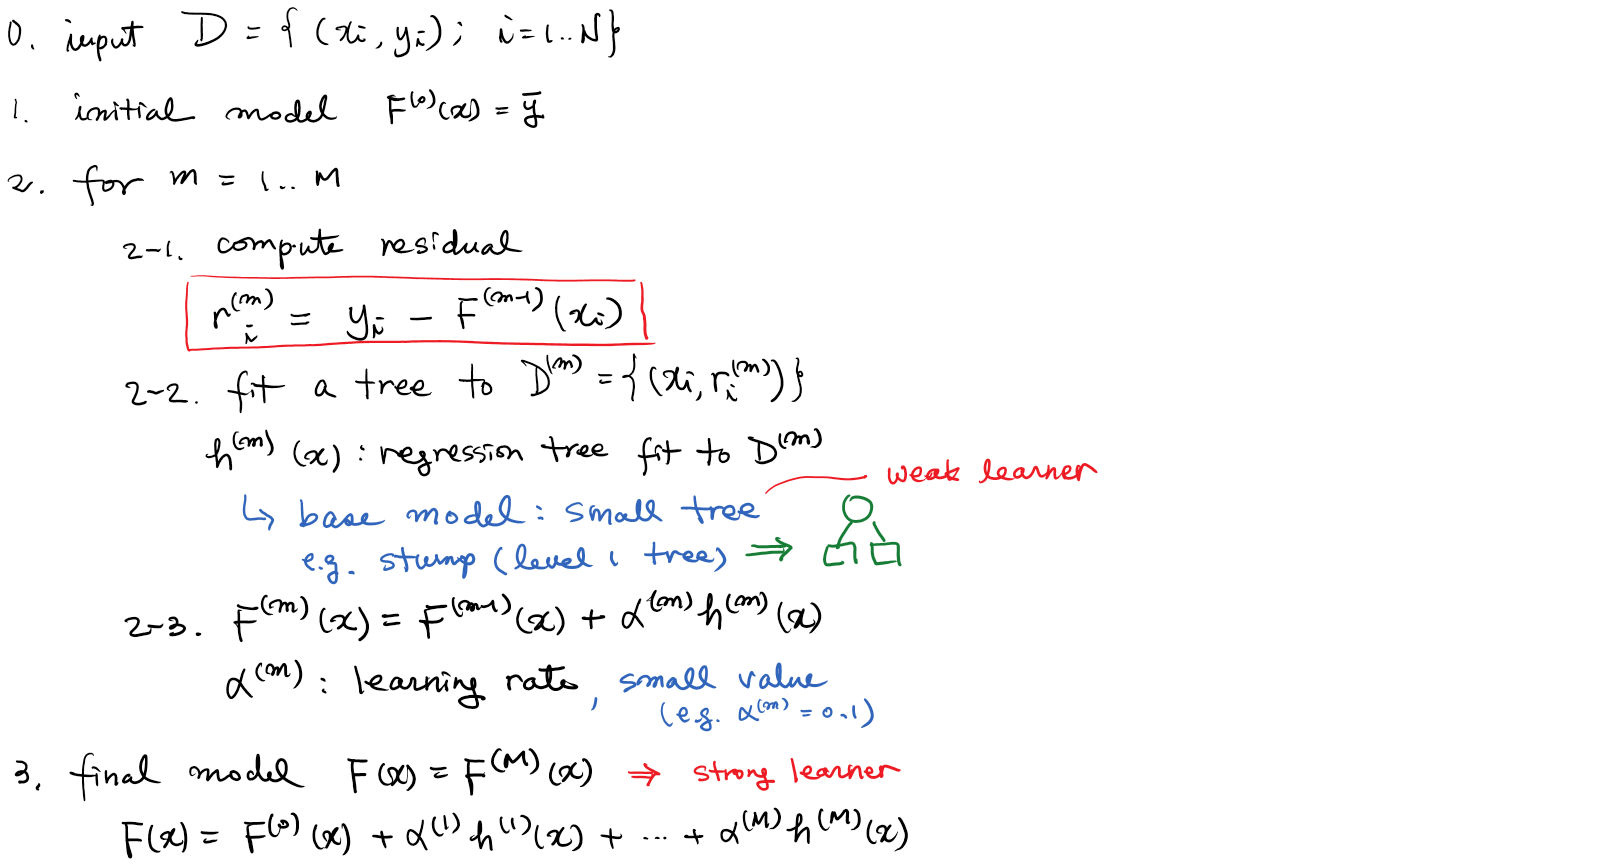

### 8-5-4. Illustrative example

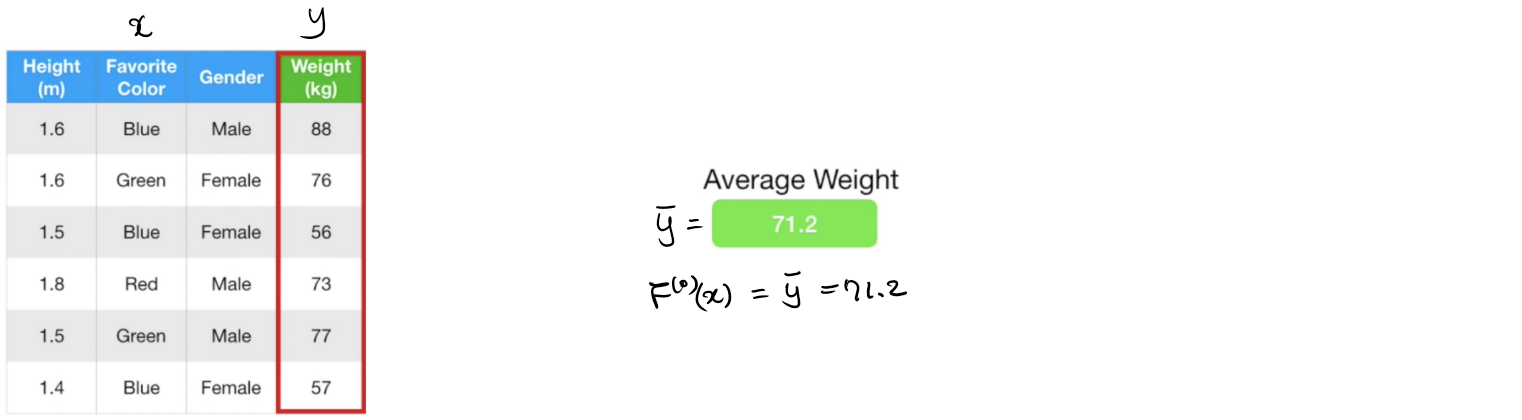

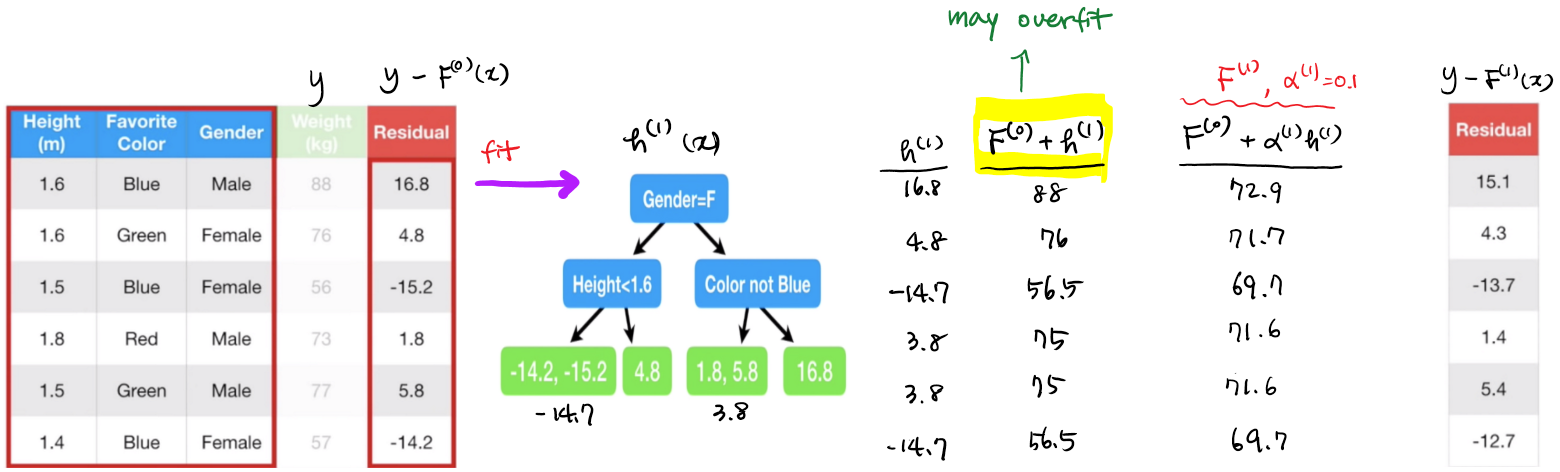

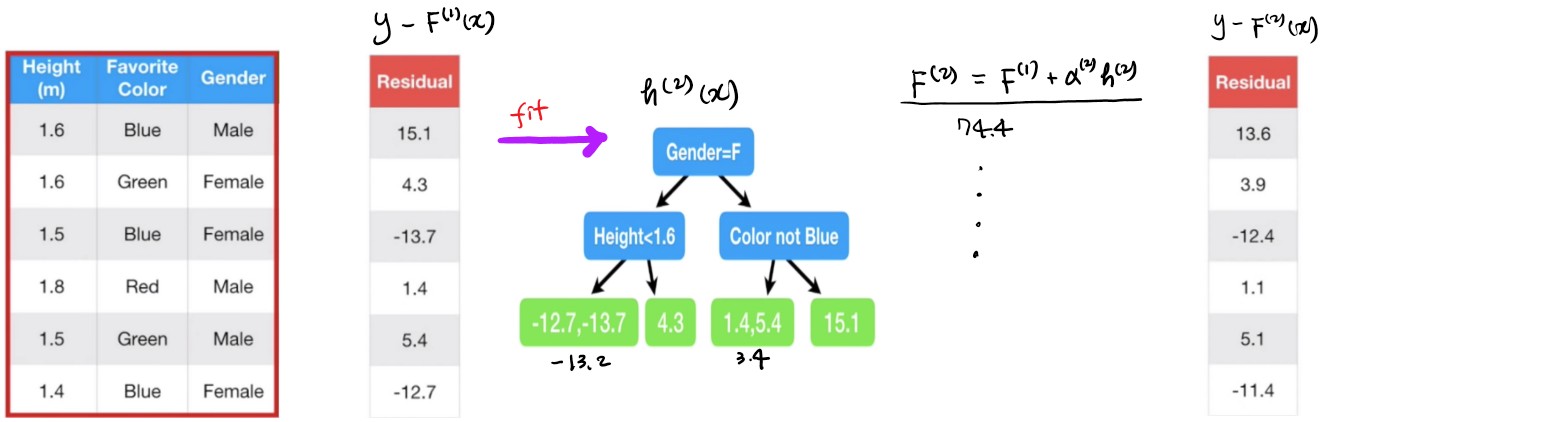

### 8-5-5. Generalization of boosting algorithm
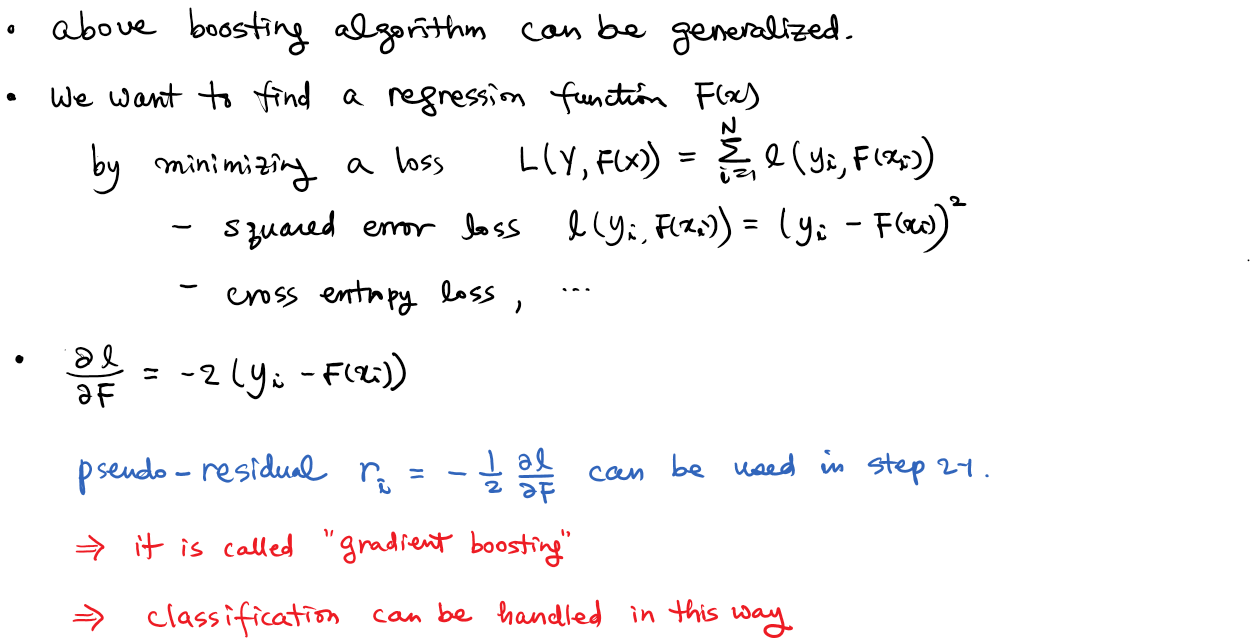

## 8-6. Fitting a decison tree to weighted samples

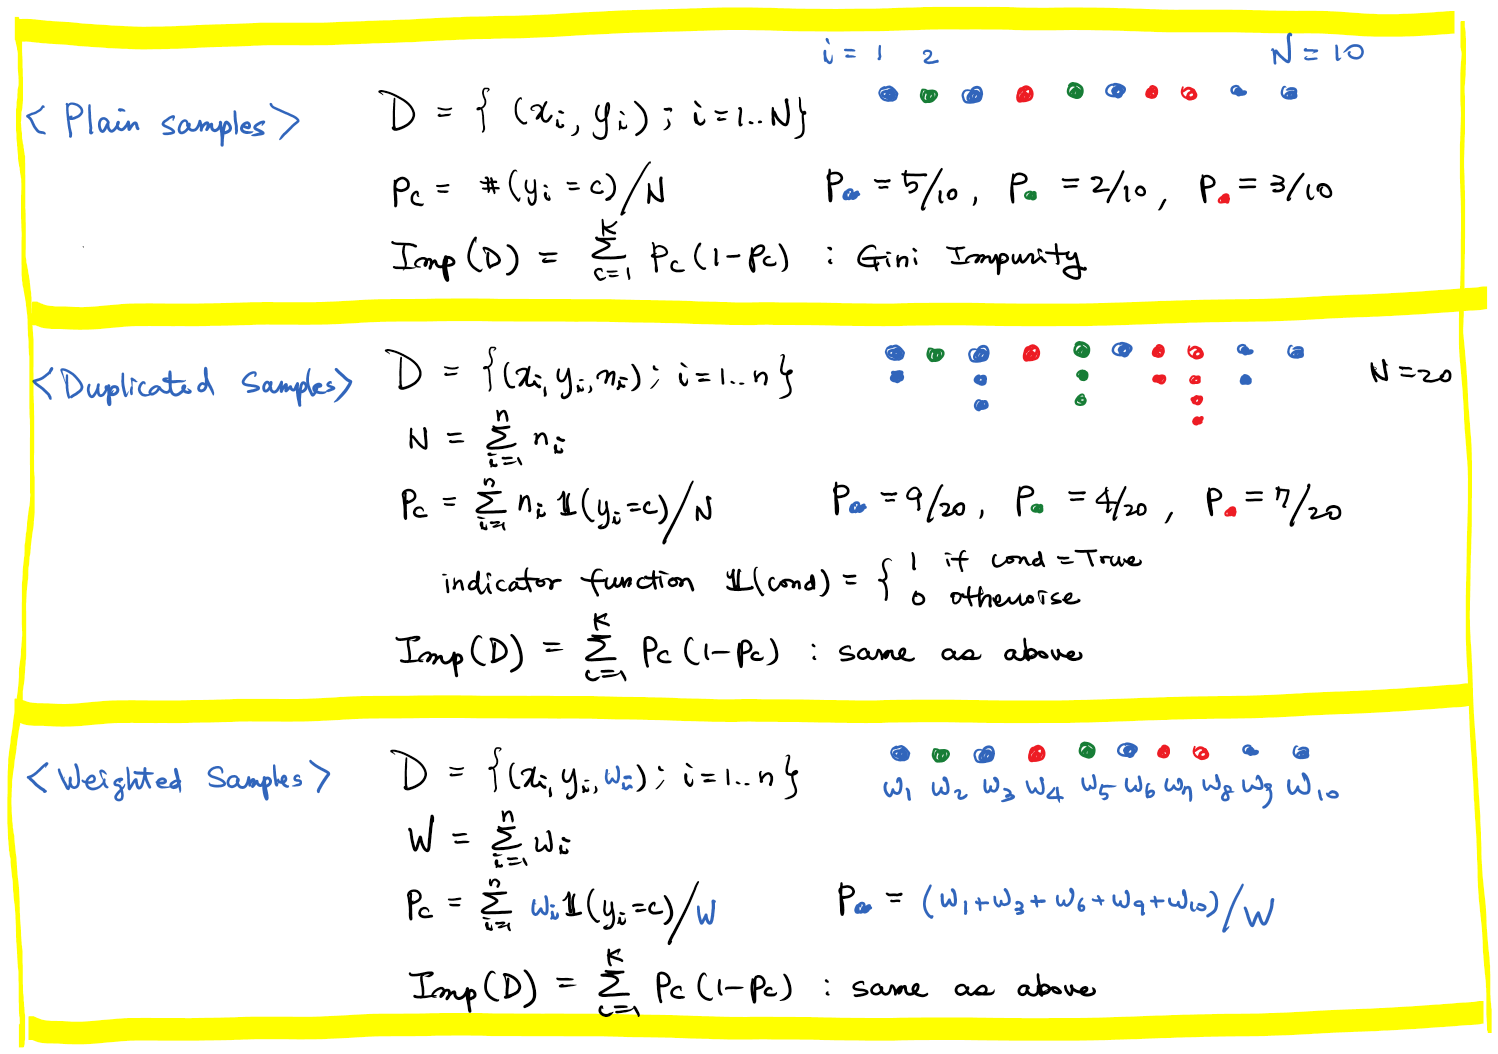

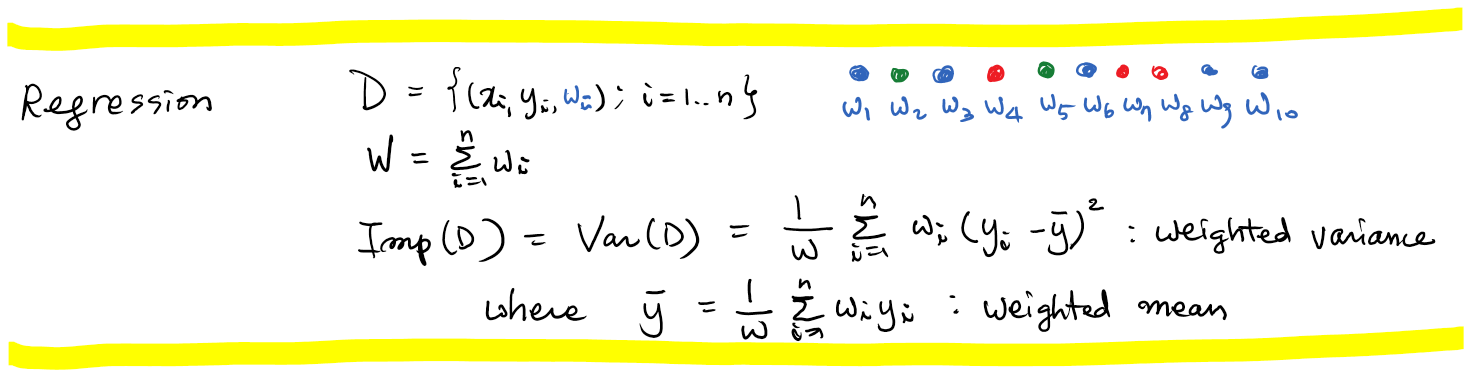

## 8-7. Popular implementations of Boosting 
### 8-7-1. AdaBoost : boosting using stumps and sample reweighting
* `sklearn.ensemble.AdaBoostClassifier`
* `sklearn.ensemble.AdaBoostRegressor`

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

print_cv_score(ab, X_iris, Y_iris, prefix='AdaBoost for iris data:')
print_cv_score(ab, X_cancer, Y_cancer, prefix='AdaBoost for breast cancer data:')

AdaBoost for iris data: R^2 mean = 0.953, std = 0.052
AdaBoost for breast cancer data: R^2 mean = 0.961, std = 0.028


### 8-7-2. GBM (Gradient Boosting Machine) : gradient boosting
* `sklearn.ensemble.GradientBoostingClassifier`
* `sklearn.ensemble.GradientBoostingClassifier`

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

print_cv_score(gbm, X_iris, Y_iris, prefix='GBM for iris data:')
print_cv_score(gbm, X_cancer, Y_cancer, prefix='GBM for breast cancer data:')

GBM for iris data: R^2 mean = 0.960, std = 0.044
GBM for breast cancer data: R^2 mean = 0.963, std = 0.025


### 8-7-3. XGBoost (eXtreme Gradient Boosting) : many enhancement over GBM
* usually shows better performance (accuracy)
* pip install xgboost
* `xgboost.XGBClassifier`
* `xgboost.XGBRegressor`

In [14]:
import xgboost   # !pip install xgboost
xgb = xgboost.XGBClassifier(verbosity=0)  # verbosity = 0

print_cv_score(xgb, X_iris, Y_iris, prefix='XGBoost for iris data:')
print_cv_score(xgb, X_cancer, Y_cancer, prefix='XGBoost for breast cancer data:')

XGBoost for iris data: R^2 mean = 0.960, std = 0.033
XGBoost for breast cancer data: R^2 mean = 0.979, std = 0.017


### 8-7-4. LightGBM : faster GBM (faster than XGBoost)
* while performance (accuracy) is similar to XGBoost, LightGBM is much faster
    * XGBoost can be very slow if data set is large
    * LightGBM is faster, and uses smaller memory
* pip install lightgbm
* `lightgbm.LGBMClassifier`
* `lightgbm.LGBMRegressor`

In [15]:
import lightgbm  # !pip install lightgbm
lgbm = lightgbm.LGBMClassifier(verbose=-1) 

print_cv_score(lgbm, X_iris, Y_iris, prefix='LightGBM for iris data:')
print_cv_score(lgbm, X_cancer, Y_cancer, prefix='LightGBM for breast cancer data:')

LightGBM for iris data: R^2 mean = 0.953, std = 0.043
LightGBM for breast cancer data: R^2 mean = 0.972, std = 0.029


### 8-7-5. Comparing them all

In [16]:
def compare_classification_2(X, Y, dataset_name):
    compare_classification(X, Y, dataset_name)

    gbm = GradientBoostingClassifier()
    print_cv_score(gbm, X, Y, prefix='GradientBoosting:')

    xgb = xgboost.XGBClassifier(verbosity=0)  # verbosity = 0
    print_cv_score(xgb, X, Y, prefix='XGBoost:')

    lgbm = lightgbm.LGBMClassifier(verbose=-1) 
    print_cv_score(lgbm, X, Y, prefix='LightGBM:')

compare_classification_2(X_iris, Y_iris, "Iris dataset")
print("")
compare_classification_2(X_cancer, Y_cancer, "Breast cancer dataset")

Testing classification performance for Iris dataset
Logistic reg.: R^2 mean = 0.973, std = 0.033
Single DT: R^2 mean = 0.960, std = 0.044
Bag of DTs: R^2 mean = 0.967, std = 0.033
Random forest: R^2 mean = 0.967, std = 0.033
GradientBoosting: R^2 mean = 0.960, std = 0.044
XGBoost: R^2 mean = 0.960, std = 0.033
LightGBM: R^2 mean = 0.953, std = 0.043

Testing classification performance for Breast cancer dataset
Logistic reg.: R^2 mean = 0.947, std = 0.021
Single DT: R^2 mean = 0.912, std = 0.031
Bag of DTs: R^2 mean = 0.960, std = 0.035
Random forest: R^2 mean = 0.963, std = 0.029
GradientBoosting: R^2 mean = 0.965, std = 0.024
XGBoost: R^2 mean = 0.979, std = 0.017
LightGBM: R^2 mean = 0.972, std = 0.029


## 8-8Tr. Heterogeneous ensemble
- Different models can be combined
- `sklearn.ensemble.VotingClassifier`
    - `estimators` : base models, to be trained individually
    - `voting`
        - hard : majority voting (default)
        - soft : sum predicted probability from each base model
            * choose the class whose probability sum is the largest
        - soft voting usually performs slightly better
            * since soft voting uses more information from base models
        - however, in soft voting, model with strong opinion (extreme probability) may win
            * soft voting works best when base models' confidence is well calibrated.
            * ex) 5 base models, 2 classes  
                - $p_i = (\text{cat prob, dog prob})$
                - $p_1 = (0.6, 0.4)$
                - $p_2 = (0.7, 0.3)$
                - $p_3 = (0.1, 0.9)$
                - $\sum_i {P_i} = (1.4, 1.6) $
                - hard voting : 'cat'
                - soft voting : 'dog'
always
- `sklearn.ensemble.StackingClassifier`
    - `estimators` : base models, to be trained individually
    - `final_estimator` : final model
        * trained from the predicted probability of base models

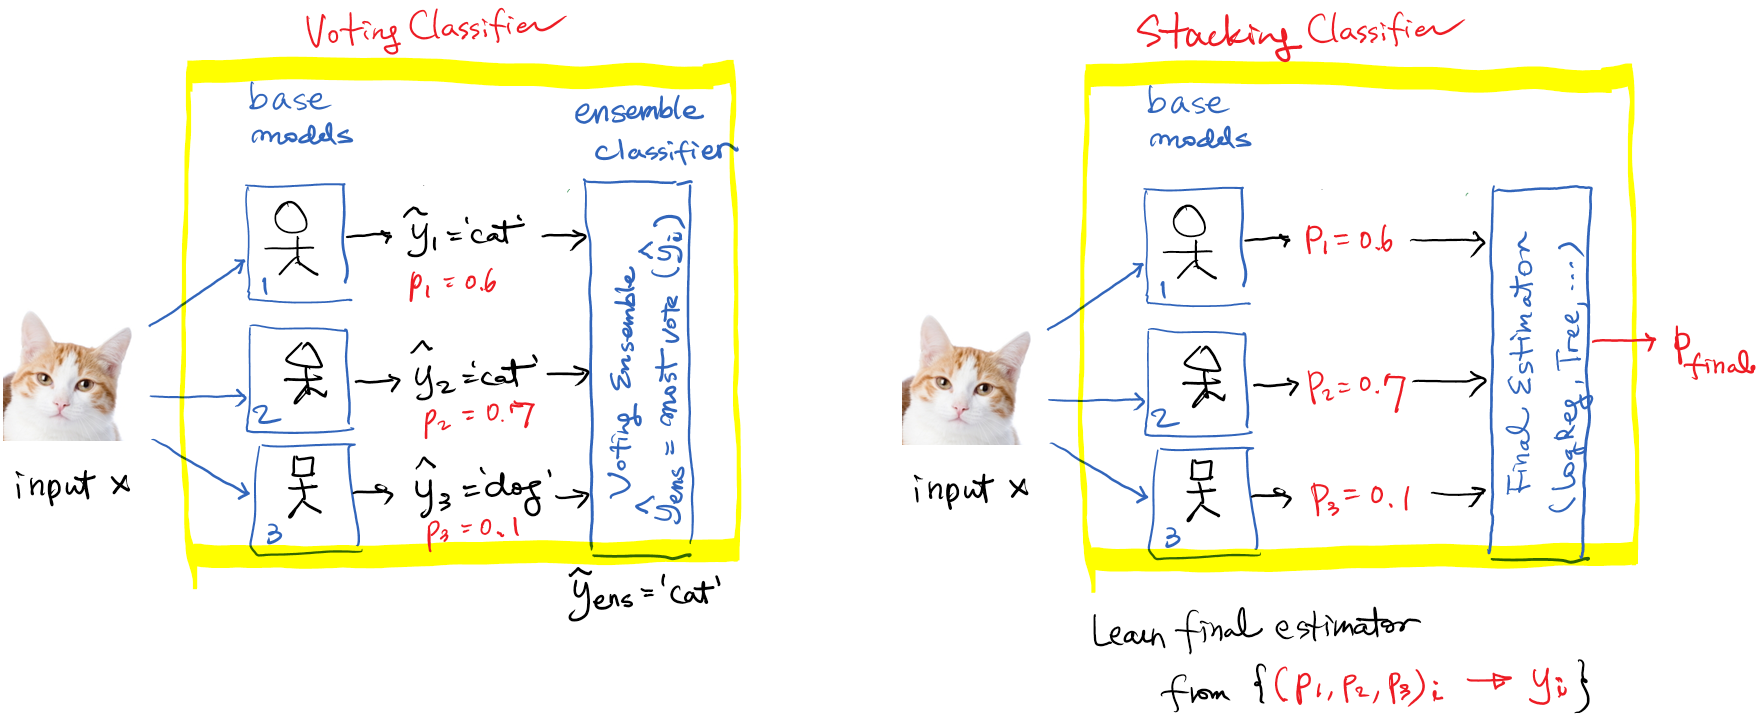

In [20]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
models = [('RF', rf), ('GBM', gbm), ('XGB', xgb), ('LightGBM', lgbm)]

voting = VotingClassifier(estimators=models, voting='soft')
print_cv_score(voting, X_cancer, Y_cancer, prefix='Voting ensemble for breast cancer data:')

lr = linear_model.LogisticRegression(multi_class='multinomial', max_iter=300)
stacking = StackingClassifier(estimators=models, final_estimator=lr)
print_cv_score(stacking, X_cancer, Y_cancer, prefix='Stacking ensemble for breast cancer data:')

Voting ensemble for breast cancer data: R^2 mean = 0.968, std = 0.019
Stacking ensemble for breast cancer data: R^2 mean = 0.972, std = 0.018
